In [48]:
import tensorflow
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [49]:
train=r'C:\Users\naman\OneDrive\Desktop\covid\Covid-19-Detection-Few-Shot-Learning\data\train'
test=r'C:\Users\naman\OneDrive\Desktop\covid\Covid-19-Detection-Few-Shot-Learning\data\test'

In [50]:
train_img=ImageDataGenerator(rescale=1/255.0)
test_img=ImageDataGenerator(rescale=1/255.0)
train_g=train_img.flow_from_directory(train,target_size=(224,224),class_mode='categorical',batch_size=20)
test_g=test_img.flow_from_directory(test,target_size=(224,224),class_mode='categorical',batch_size=20)

Found 72 images belonging to 3 classes.
Found 36 images belonging to 3 classes.


In [51]:
from keras.layers import *
from keras.models import * 

In [56]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))


In [57]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 52, 52, 128)      

In [58]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [59]:
hist=model.fit(train_g,steps_per_epoch=len(train_g),epochs=15,validation_data=test_g,validation_steps=len(test_g))

Epoch 1/15
4/4 [==============================] - 43s 10s/step - loss: 2.7875 - accuracy: 0.4106 - val_loss: 1.1464 - val_accuracy: 0.3333
Epoch 2/15
4/4 [==============================] - 36s 10s/step - loss: 1.6415 - accuracy: 0.2647 - val_loss: 1.0975 - val_accuracy: 0.4444
Epoch 3/15
4/4 [==============================] - 36s 8s/step - loss: 1.0920 - accuracy: 0.4568 - val_loss: 1.0970 - val_accuracy: 0.5833
Epoch 4/15
4/4 [==============================] - 39s 9s/step - loss: 1.0870 - accuracy: 0.4410 - val_loss: 1.0833 - val_accuracy: 0.4167
Epoch 5/15
4/4 [==============================] - 37s 9s/step - loss: 1.0433 - accuracy: 0.4188 - val_loss: 1.0205 - val_accuracy: 0.7778
Epoch 6/15
4/4 [==============================] - 35s 8s/step - loss: 0.9574 - accuracy: 0.5811 - val_loss: 0.9547 - val_accuracy: 0.4167
Epoch 7/15
4/4 [==============================] - 36s 9s/step - loss: 0.8660 - accuracy: 0.5998 - val_loss: 0.8326 - val_accuracy: 0.6111
Epoch 8/15
4/4 [================

(0.0, 1.0)

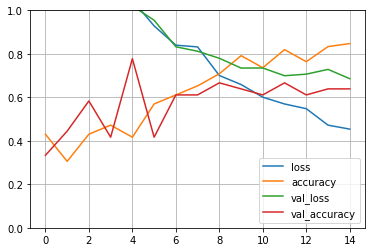

In [60]:
import pandas as pd
pd.DataFrame(hist.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)

In [61]:
hist=model.fit(train_g,steps_per_epoch=len(train_g),epochs=15,validation_data=test_g,validation_steps=len(test_g))

Epoch 1/15
4/4 [==============================] - 37s 9s/step - loss: 0.3905 - accuracy: 0.8611 - val_loss: 0.7120 - val_accuracy: 0.6389
Epoch 2/15
4/4 [==============================] - 40s 10s/step - loss: 0.4971 - accuracy: 0.8333 - val_loss: 0.6749 - val_accuracy: 0.7500
Epoch 3/15
4/4 [==============================] - 39s 9s/step - loss: 0.4206 - accuracy: 0.8333 - val_loss: 0.6868 - val_accuracy: 0.6389
Epoch 4/15
4/4 [==============================] - 37s 9s/step - loss: 0.3661 - accuracy: 0.8750 - val_loss: 0.7609 - val_accuracy: 0.5556
Epoch 5/15
4/4 [==============================] - 36s 9s/step - loss: 0.3343 - accuracy: 0.8889 - val_loss: 0.6798 - val_accuracy: 0.8611
Epoch 6/15
4/4 [==============================] - 35s 10s/step - loss: 0.3175 - accuracy: 0.8889 - val_loss: 0.6800 - val_accuracy: 0.6667
Epoch 7/15
4/4 [==============================] - 36s 9s/step - loss: 0.3114 - accuracy: 0.8889 - val_loss: 0.7758 - val_accuracy: 0.6111
Epoch 8/15
4/4 [================

In [62]:
hist.params

{'verbose': 1, 'epochs': 15, 'steps': 4}

In [63]:
model.save('covid.h5')

In [64]:
from tensorflow.keras.models import load_model
model=load_model('covid.h5')

In [85]:
from tensorflow.keras.preprocessing import image
img=image.load_img(r'C:\Users\naman\OneDrive\Desktop\covid\Covid-19-Detection-Few-Shot-Learning\data\test\Covid\096.png',target_size=(224,224))
img=image.img_to_array(img)
img

array([[[ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        [ 7.,  7.,  7.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 7.,  7.,  7.],
        [ 7.,  7.,  7.],
        [ 8.,  8.,  8.],
        ...,
        [ 4.,  4.,  4.],
        [ 4.,  4.,  4.],
        [ 5.,  5.,  5.]],

       [[ 7.,  7.,  7.],
        [ 8.,  8.,  8.],
        [ 8.,  8.,  8.],
        ...,
        [ 7.,  7.,  7.],
        [ 8.,  8.,  8.],
        [ 8.,  8.,  8.]],

       ...,

       [[ 9.,  9.,  9.],
        [10., 10., 10.],
        [10., 10., 10.],
        ...,
        [ 6.,  6.,  6.],
        [ 7.,  7.,  7.],
        [ 7.,  7.,  7.]],

       [[10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 10.],
        ...,
        [ 6.,  6.,  6.],
        [ 7.,  7.,  7.],
        [ 8.,  8.,  8.]],

       [[10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 10.],
        ...,
        [ 6.,  6.,  6.],
        [ 5.,  5.,  5.],
        [ 5.,  5.,  5.]]

In [86]:
img1=np.expand_dims(img,axis=0)
img1.shape

(1, 224, 224, 3)

In [87]:
a=np.argmax(model.predict(img1), axis=1)
a.shape

(1,)

In [89]:
from PIL import Image
img2 = Image.fromarray(img, 'RGB')
img2.show()

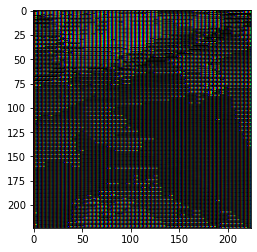

In [90]:
plt.imshow(img2)